In [4]:
# Import necessary libraries for Linear Regression

import numpy as np                                  # For numerical operations (Numerical Python)
import matplotlib.pyplot as plt                     # For data visualization (graphs, charts)
from sklearn.linear_model import LinearRegression   # For Linear Regression model

print("Libraries imported successfully!")

Libraries imported successfully!


In [6]:
# Create sample data for Linear Regression

# Independent variable (X): Study hours of students
hours = np.array([2, 4, 6, 8, 10]).reshape(-1, 1)  
# reshape(-1, 1) এক ডাইমেনশনাল অ্যারেকে দুই ডাইমেনশনাল কলাম ভেক্টরে রূপান্তর করে (sklearn-এর প্রয়োজনে)

# Dependent variable (y): Marks obtained by students
marks = np.array([55, 60, 70, 80, 88])  

# Display the created data to verify structure
print("Study Hours:")
print(hours)
print("\nMarks:")
print(marks)
print("\nData shape verification:")
print("Hours shape:", hours.shape)  # Should be (5, 1) for sklearn compatibility
print("Marks shape:", marks.shape)  # Should be (5,)

# পরবর্তী প্রক্রিয়াকরণের জন্য ডেটা রিটার্ন করা হচ্ছে
hours, marks

Study Hours:
[[ 2]
 [ 4]
 [ 6]
 [ 8]
 [10]]

Marks:
[55 60 70 80 88]

Data shape verification:
Hours shape: (5, 1)
Marks shape: (5,)


(array([[ 2],
        [ 4],
        [ 6],
        [ 8],
        [10]]),
 array([55, 60, 70, 80, 88]))

In [7]:
# লিনিয়ার রিগ্রেশন মডেল তৈরি এবং ট্রেনিং করা
model = LinearRegression()  

# আমাদের ডেটা ব্যবহার করে মডেলটি ট্রেনিং করা
# fit() মেথডটি আমাদের ডেটার সাথে সবচেয়ে ভালো লাইন খুঁজে বের করে
model.fit(hours, marks)

print("Model trained successfully!")
print("The model has learned the relationship between study hours and marks.")

Model trained successfully!
The model has learned the relationship between study hours and marks.


In [23]:
# ট্রেনিং হওয়া মডেলের প্যারামিটার বিশ্লেষণ করা
print("=== Model Parameters Analysis ===")

# কোএফিসিয়েন্ট (slope, m): প্রতি অতিরিক্ত পড়ার ঘন্টায় কত নম্বর বাড়বে
print("Coefficient (slope, m):", model.coef_[0])    
print("Interpretation: For each additional hour of study, marks increase by", model.coef_[0])

# ইন্টারসেপ্ট (c): পড়ার ঘন্টা = 0 হলে কত নম্বর হবে
print("Intercept (c):", model.intercept_)          
print("Interpretation: Even with 0 hours of study, marks would be", model.intercept_)

# আমাদের লাইনের সমীকরণ: y = mx + c
print(f"\nLine equation: Marks = {model.coef_[0]} × Hours + {model.intercept_}")

# ট্রেনিং হওয়া মডেল ব্যবহার করে আমাদের ডেটায় প্রেডিকশন করা
predicted_marks = model.predict(hours)
print("\nPredicted marks using the model:")
print(predicted_marks)

# আসল এবং প্রেডিক্টেড নম্বরের তুলনা করা বিস্তারিত বিশ্লেষণসহ
print("\nDetailed Comparison of Actual and Predicted Marks:")
print("-" * 70)
print("Hours | Actual | Predicted | Difference | Error %")
print("-" * 70)

total_error = 0
for i in range(len(hours)):
    actual = marks[i]
    predicted = predicted_marks[i]
    difference = abs(actual - predicted)
    error_percent = (difference / actual) * 100
    total_error += difference
    
    print(f"{hours[i][0]:5.0f}  | {actual:4.0f}  | {predicted:6.1f}   | {difference:8.1f}   | {error_percent:5.1f}%")

print("-" * 70)
print(f"Total Error: {total_error:.2f}")
print(f"Average Error: {total_error/len(hours):.2f}")

=== Model Parameters Analysis ===
Coefficient (slope, m): 4.3
Interpretation: For each additional hour of study, marks increase by 4.3
Intercept (c): 44.8
Interpretation: Even with 0 hours of study, marks would be 44.8

Line equation: Marks = 4.3 × Hours + 44.8

Predicted marks using the model:
[53.4 62.  70.6 79.2 87.8]

Detailed Comparison of Actual and Predicted Marks:
----------------------------------------------------------------------
Hours | Actual | Predicted | Difference | Error %
----------------------------------------------------------------------
    2  |   55  |   53.4   |      1.6   |   2.9%
    4  |   60  |   62.0   |      2.0   |   3.3%
    6  |   70  |   70.6   |      0.6   |   0.9%
    8  |   80  |   79.2   |      0.8   |   1.0%
   10  |   88  |   87.8   |      0.2   |   0.2%
----------------------------------------------------------------------
Total Error: 5.20
Average Error: 1.04


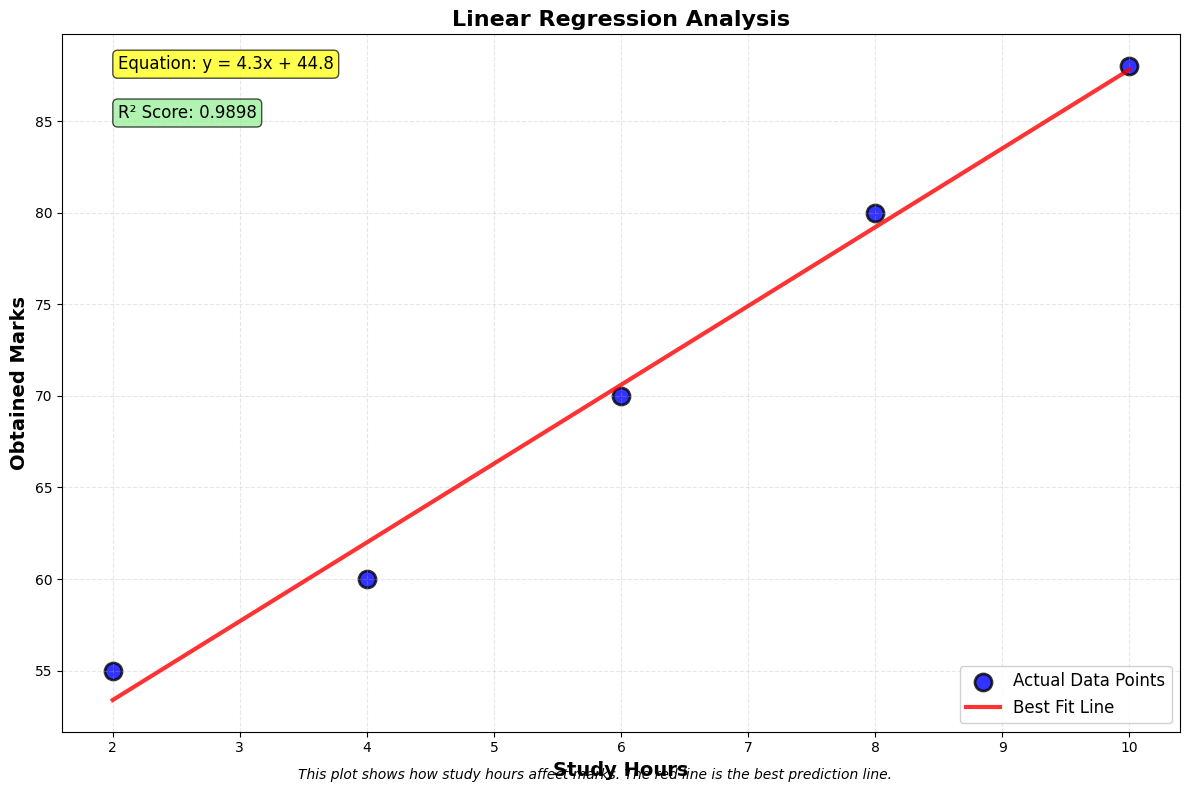

Visualization created successfully!


In [25]:
# লিনিয়ার রিগ্রেশন ফলাফল ভিজ্যুয়ালাইজ করা
plt.figure(figsize=(12, 8))  

# আসল ডেটা পয়েন্ট প্লট করা (স্ক্যাটার প্লট)
plt.scatter(hours, marks, color='blue', label='Actual Data Points', 
           s=150, alpha=0.8, edgecolors='black', linewidth=2)

# রিগ্রেশন লাইন প্লট করা (বেস্ট ফিট লাইন)
plt.plot(hours, predicted_marks, color='red', linewidth=3, label='Best Fit Line', alpha=0.8)

# লেবেল এবং টাইটেল যোগ করা
plt.xlabel('Study Hours', fontsize=14, fontweight='bold')
plt.ylabel('Obtained Marks', fontsize=14, fontweight='bold')
plt.title('Linear Regression Analysis', fontsize=16, fontweight='bold')

# ভালো পাঠযোগ্যতার জন্য গ্রিড যোগ করা
plt.grid(True, alpha=0.3, linestyle='--')

# প্লটের উপর লাইনের সমীকরণ যোগ করা
equation = f'y = {model.coef_[0]:.1f}x + {model.intercept_:.1f}'
plt.annotate(f'Equation: {equation}', 
             xy=(0.05, 0.95), xycoords='axes fraction',
             fontsize=12, bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

# প্লটের উপর R² স্কোর যোগ করা
from sklearn.metrics import r2_score
r2 = r2_score(marks, predicted_marks)
plt.annotate(f'R² Score: {r2:.4f}', 
             xy=(0.05, 0.88), xycoords='axes fraction',
             fontsize=12, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.7))

# লিজেন্ড কাস্টমাইজ করা
plt.legend(fontsize=12, loc='lower right', framealpha=0.9)

# ব্যাখ্যামূলক টেক্সট যোগ করা
plt.figtext(0.5, 0.02, 
            'This plot shows how study hours affect marks. The red line is the best prediction line.',
            ha='center', fontsize=10, style='italic', wrap=True)

# টেক্সট ওভারল্যাপ প্রতিরোধ করতে লেআউট এডজাস্ট করা
plt.tight_layout()

# প্লট দেখানো
plt.show()

print("Visualization created successfully!")

In [26]:
# নতুন, অদেখা ডেটার জন্য প্রেডিকশন করা
print("=== Making Predictions for New Data ===")

# প্রেডিকশনের জন্য নতুন পড়ার ঘন্টা নির্ধারণ করা
new_hours = np.array([[7]])  # A student who studies for 7 hours

print(f"Making prediction for {new_hours[0][0]} hours of study...")

# ট্রেনিং হওয়া মডেল ব্যবহার করে প্রেডিকশন করা
prediction = model.predict(new_hours)
print(f"\nModel prediction:")
print(f"Predicted marks for studying {new_hours[0][0]} hours: {prediction[0]:.1f}")

# সমীকরণ ব্যবহার করে হাতে করা গণনা দিয়ে প্রেডিকশন যাচাই করা
print(f"\nManual calculation verification:")
print(f"Equation: y = {model.coef_[0]}x + {model.intercept_}")
print(f"Calculation: y = {model.coef_[0]} × {new_hours[0][0]} + {model.intercept_}")

manual_calculation = 4.3 * 7 + 44.8
print(f"Result: y = {manual_calculation:.1f}")

# মডেল প্রেডিকশন এবং হাতে করা গণনার তুলনা করা
difference = abs(prediction[0] - manual_calculation)
print(f"\nComparison:")
print(f"Model prediction: {prediction[0]:.1f}")
print(f"Manual calculation: {manual_calculation:.1f}")
print(f"Difference: {difference:.2f}")

if difference == 0:
    print("\n✅ Perfect match! Model calculation is correct.")
else:
    print(f"\n⚠️ Small difference of {difference:.2f} (due to floating-point precision)")

# একাধিক ভিন্ন পড়ার ঘন্টার জন্য প্রেডিকশন করা
print(f"\n=== Predictions for Different Study Hours ===")
test_hours = np.array([[1], [3], [5], [9], [12]])  # Various study hours
test_predictions = model.predict(test_hours)

print("Study Hours → Predicted Marks")
print("-" * 30)
for i in range(len(test_hours)):
    print(f"{test_hours[i][0]:10} → {test_predictions[i]:13.1f}")

=== Making Predictions for New Data ===
Making prediction for 7 hours of study...

Model prediction:
Predicted marks for studying 7 hours: 74.9

Manual calculation verification:
Equation: y = 4.3x + 44.8
Calculation: y = 4.3 × 7 + 44.8
Result: y = 74.9

Comparison:
Model prediction: 74.9
Manual calculation: 74.9
Difference: 0.00

✅ Perfect match! Model calculation is correct.

=== Predictions for Different Study Hours ===
Study Hours → Predicted Marks
------------------------------
         1 →          49.1
         3 →          57.7
         5 →          66.3
         9 →          83.5
        12 →          96.4


In [27]:
# লিনিয়ার রিগ্রেশন এবং SGD রিগ্রেশনের জন্য লাইব্রেরি ইমপোর্ট
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, SGDRegressor  
# LinearRegression: Ordinary Least Squares method
# SGDRegressor: Stochastic Gradient Descent method

from sklearn.metrics import mean_squared_error  
# mean_squared_error: Model performance measurement

print("Libraries for model comparison imported successfully!")

print("\n=== Model Differences ===")
print("LinearRegression: Uses exact mathematical solution")
print("SGDRegressor: Uses iterative approximation")

Libraries for model comparison imported successfully!

=== Model Differences ===
LinearRegression: Uses exact mathematical solution
SGDRegressor: Uses iterative approximation


In [28]:
# লিনিয়ার রিগ্রেশন মডেল তৈরি এবং ট্রেনিং করা
print("=== Training Linear Regression Model ===")

lin_reg = LinearRegression()
lin_reg.fit(hours, marks)

# বিস্তারিত ব্যাখ্যাসহ মডেল প্যারামিটার দেখানো
print("Model training completed!")

print(f"\nLinear Regression Coefficient (slope, m): {lin_reg.coef_[0]}")
print(f"Interpretation: For each additional hour of study, marks increase by {lin_reg.coef_[0]}")

print(f"\nLinear Regression Intercept (c): {lin_reg.intercept_}")
print(f"Interpretation: Even with 0 hours of study, marks would be {lin_reg.intercept_:.1f}")

# সম্পূর্ণ সমীকরণ দেখানো
print(f"\nComplete Equation:")
print(f"Marks = {lin_reg.coef_[0]:.1f} × Hours + {lin_reg.intercept_:.1f}")

# উদাহরণ গণনা
example_hours = 5
example_marks = lin_reg.coef_[0] * example_hours + lin_reg.intercept_
print(f"\nExample: For {example_hours} hours of study:")
print(f"Expected marks = {lin_reg.coef_[0]:.1f} × {example_hours} + {lin_reg.intercept_:.1f} = {example_marks:.1f}")

=== Training Linear Regression Model ===
Model training completed!

Linear Regression Coefficient (slope, m): 4.3
Interpretation: For each additional hour of study, marks increase by 4.3

Linear Regression Intercept (c): 44.8
Interpretation: Even with 0 hours of study, marks would be 44.8

Complete Equation:
Marks = 4.3 × Hours + 44.8

Example: For 5 hours of study:
Expected marks = 4.3 × 5 + 44.8 = 66.3


In [30]:
# লিনিয়ার রিগ্রেশন মডেল দিয়ে প্রেডিকশন এবং এরর ক্যালকুলেশন
print("=== Linear Regression Model Evaluation ===")

# ট্রেনিং হওয়া মডেল দিয়ে প্রেডিকশন করা
pred_marks = lin_reg.predict(hours)
print("Predictions made for all training data points.")

# মিন স্কয়ারড এরর (MSE) ক্যালকুলেশন করা
mse_lin = mean_squared_error(marks, pred_marks)
print(f"\nLinear Regression Mean Squared Error (MSE): {mse_lin:.3f}")

# বিস্তারিত এরর বিশ্লেষণ
print(f"\nDetailed Error Analysis:")
print("-" * 50)
print("Actual | Predicted | Error | Error²")
print("-" * 50)

total_squared_error = 0
for i in range(len(hours)):
    actual = marks[i]
    predicted = pred_marks[i]
    error = actual - predicted
    squared_error = error ** 2
    total_squared_error += squared_error
    
    print(f"{actual:6.0f}  | {predicted:8.1f}  | {error:5.1f}  | {squared_error:6.2f}")

print("-" * 50)
calculated_mse = total_squared_error / len(hours)
print(f"Sum of Error²: {total_squared_error:.6f}")
print(f"Average (MSE): {calculated_mse:.6f}")

# MSE মানের ব্যাখ্যা
print(f"\nMSE Interpretation:")
if mse_lin < 5:
    print("✅ Excellent model (MSE < 5): Very low average error")
elif mse_lin < 15:
    print("✅ Good model (5 ≤ MSE < 15): Low average error")
else:
    print("⚠️ Model needs improvement (MSE ≥ 15): High average error")

=== Linear Regression Model Evaluation ===
Predictions made for all training data points.

Linear Regression Mean Squared Error (MSE): 1.520

Detailed Error Analysis:
--------------------------------------------------
Actual | Predicted | Error | Error²
--------------------------------------------------
    55  |     53.4  |   1.6  |   2.56
    60  |     62.0  |  -2.0  |   4.00
    70  |     70.6  |  -0.6  |   0.36
    80  |     79.2  |   0.8  |   0.64
    88  |     87.8  |   0.2  |   0.04
--------------------------------------------------
Sum of Error²: 7.600000
Average (MSE): 1.520000

MSE Interpretation:
✅ Excellent model (MSE < 5): Very low average error


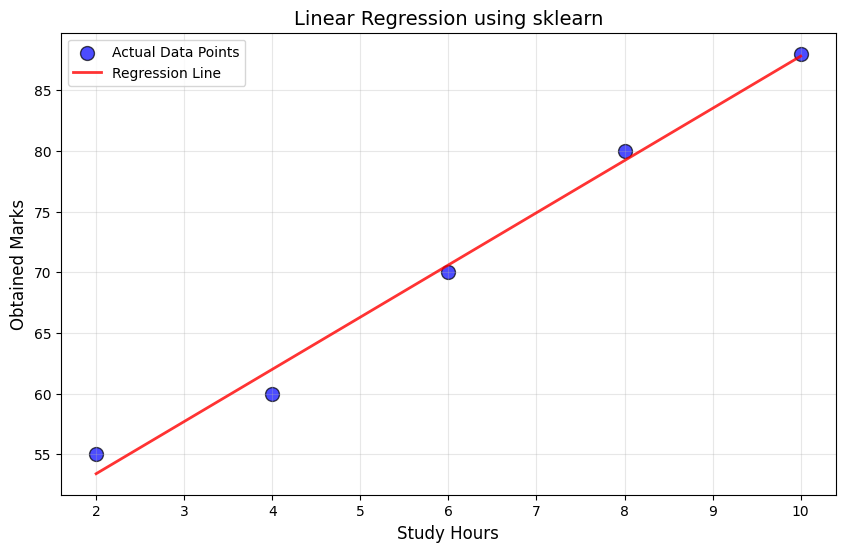

Linear Regression visualization completed!


In [31]:
# লিনিয়ার রিগ্রেশন ফলাফল ভিজ্যুয়ালাইজ করা
plt.figure(figsize=(10, 6))

# আসল ডেটা পয়েন্ট প্লট করা
plt.scatter(hours, marks, color='blue', label='Actual Data Points', 
           s=100, alpha=0.7, edgecolors='black', linewidth=1)

# রিগ্রেশন লাইন প্লট করা
plt.plot(hours, pred_marks, color='red', linewidth=2, label='Regression Line', alpha=0.8)

# লেবেল এবং টাইটেল যোগ করা
plt.xlabel('Study Hours', fontsize=12)
plt.ylabel('Obtained Marks', fontsize=12)
plt.title('Linear Regression using sklearn', fontsize=14)

# গ্রিড যোগ করা
plt.grid(True, alpha=0.3)

# লিজেন্ড যোগ করা
plt.legend(fontsize=10)

# প্লট দেখানো
plt.show()

print("Linear Regression visualization completed!")

In [ ]:
# SGD রিগ্রেশন মডেল তৈরি এবং ট্রেনিং বিস্তারিত ব্যাখ্যাসহ
print("=== Training SGD Regression Model ===")

print("SGD stands for Stochastic Gradient Descent")
print("It's an iterative optimization method that works well with large datasets")

# নির্দিষ্ট প্যারামিটারসহ SGD মডেল তৈরি করা
sgd_reg = SGDRegressor(
    max_iter=1000,              # Maximum number of iterations
    random_state=42,            # For reproducible results
    learning_rate='invscaling', # Learning rate schedule
    eta0=0.01,                  # Initial learning rate
    tol=1e-3                    # Tolerance for stopping
)

print(f"\nSGD Model Parameters:")
print(f"max_iter: {sgd_reg.max_iter} (maximum iterations)")
print(f"learning_rate: {sgd_reg.learning_rate} (learning rate schedule)")
print(f"eta0: {sgd_reg.eta0} (initial learning rate)")

# মডেলটি ট্রেনিং করা
print(f"\nTraining SGD model...")
sgd_reg.fit(hours, marks)

# SGD মডেলের প্যারামিটার দেখানো
print(f"\nSGD Regression Coefficient (slope): {sgd_reg.coef_[0]:.6f}")

# ইন্টারসেপ্ট হ্যান্ডেল করা (SGD অ্যারে বা স্কেলার রিটার্ন করতে পারে)
if hasattr(sgd_reg.intercept_, '__len__') and len(sgd_reg.intercept_) > 0:
    intercept_val = sgd_reg.intercept_[0]
else:
    intercept_val = sgd_reg.intercept_

print(f"SGD Regression Intercept: {intercept_val:.6f}")

# লিনিয়ার রিগ্রেশন প্যারামিটারের সাথে তুলনা করা
print(f"\n=== Parameter Comparison ===")
print(f"Linear Regression Coefficient: {lin_reg.coef_[0]:.6f}")
print(f"SGD Regression Coefficient:    {sgd_reg.coef_[0]:.6f}")
print(f"Linear Regression Intercept:   {lin_reg.intercept_:.6f}")
print(f"SGD Regression Intercept:      {intercept_val:.6f}")

# প্রেডিকশন করা এবং এরর ক্যালকুলেশন করা
pred_sgd_marks = sgd_reg.predict(hours)
mse_sgd = mean_squared_error(marks, pred_sgd_marks)

print(f"\nSGD Regression Mean Squared Error (MSE): {mse_sgd:.6f}")

# MSE মানের তুলনা করা
print(f"\n=== MSE Comparison ===")
print(f"Linear Regression MSE: {mse_lin:.6f}")
print(f"SGD Regression MSE:    {mse_sgd:.6f}")

if mse_sgd < mse_lin:
    print("✅ SGD has lower MSE (better performance on this data)")
elif abs(mse_sgd - mse_lin) < 1:
    print("➰ Both models have similar MSE")
else:
    print("⚠️ SGD has higher MSE (worse performance on this small dataset)")
    print("Note: SGD works better with large datasets")

=== Training SGD Regression Model ===
SGD stands for Stochastic Gradient Descent
It's an iterative optimization method that works well with large datasets

SGD Model Parameters:
max_iter: 1000 (maximum iterations)
learning_rate: invscaling (learning rate schedule)
eta0: 0.01 (initial learning rate)

Training SGD model...

SGD Regression Coefficient (slope): 5.698065
SGD Regression Intercept: 34.475265

=== Parameter Comparison ===
Linear Regression Coefficient: 4.300000
SGD Regression Coefficient:    5.698065
Linear Regression Intercept:   44.800000
SGD Regression Intercept:      34.475265

SGD Regression Mean Squared Error (MSE): 20.906116

=== MSE Comparison ===
Linear Regression MSE: 1.520000
SGD Regression MSE:    20.906116
⚠️ SGD has higher MSE (worse performance on this small dataset)
Note: SGD works better with large datasets


p:\AIML\venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


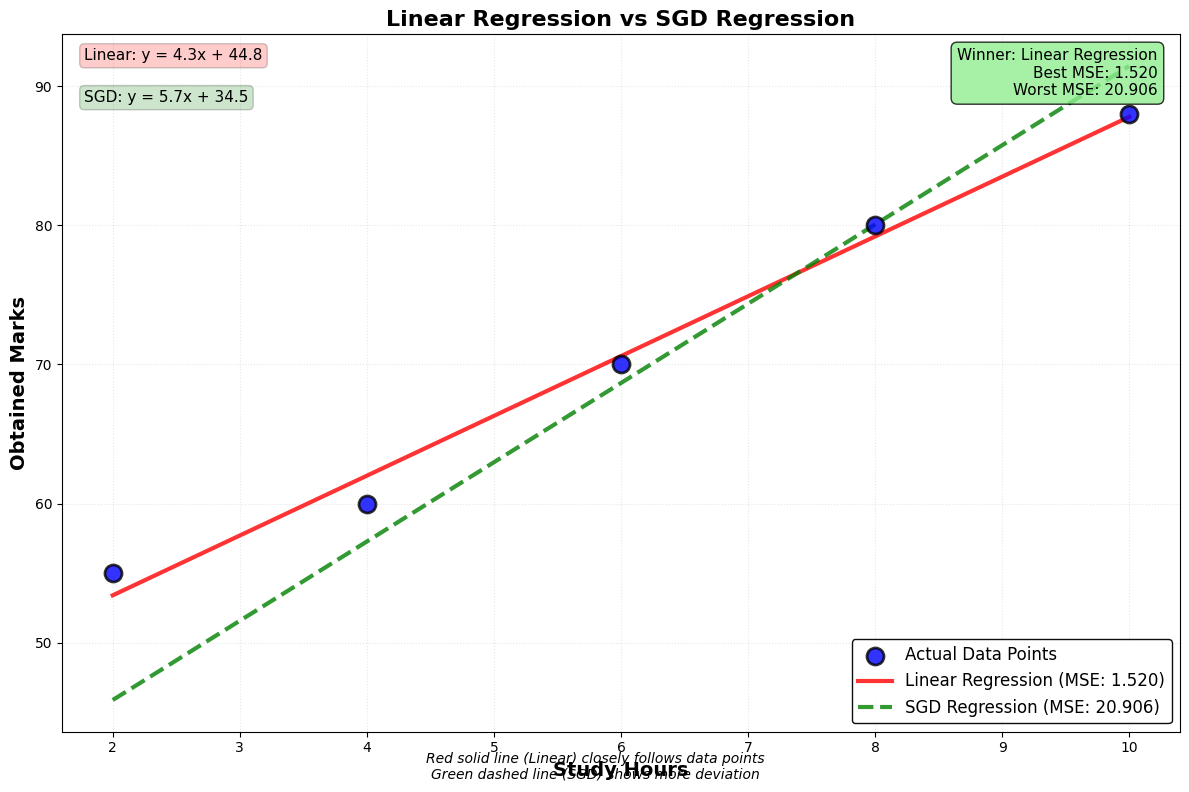

Comparative visualization completed!

=== Visual Analysis Summary ===
Linear Regression line (red): ✅ Better fit
SGD Regression line (green): ⚠️ Worse fit
Note: For small datasets, Linear Regression usually performs better


In [33]:
# উভয় মডেলের তুলনামূলক ভিজ্যুয়ালাইজেশন
plt.figure(figsize=(12, 8))

# আসল ডেটা পয়েন্ট প্লট করা
plt.scatter(hours, marks, color='blue', label='Actual Data Points', 
           s=150, alpha=0.8, edgecolors='black', linewidth=2, zorder=5)

# লিনিয়ার রিগ্রেশন লাইন প্লট করা
plt.plot(hours, predicted_marks, 
         label=f'Linear Regression (MSE: {mse_lin:.3f})', 
         linestyle='-', linewidth=3, color='red', alpha=0.8)

# SGD রিগ্রেশন লাইন প্লট করা
plt.plot(hours, pred_sgd_marks, 
         label=f'SGD Regression (MSE: {mse_sgd:.3f})', 
         linestyle='--', linewidth=3, color='green', alpha=0.8)

# উভয় ভাষায় লেবেল এবং টাইটেল যোগ করা
plt.xlabel('Study Hours', fontsize=14, fontweight='bold')
plt.ylabel('Obtained Marks', fontsize=14, fontweight='bold')
plt.title('Linear Regression vs SGD Regression', 
          fontsize=16, fontweight='bold')

# ভালো পাঠযোগ্যতার জন্য গ্রিড যোগ করা
plt.grid(True, alpha=0.3, linestyle=':')

# মডেল বিবরণসহ উন্নত লিজেন্ড
legend = plt.legend(fontsize=12, loc='lower right', framealpha=0.95)
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1)

# মডেল সমীকরণ যোগ করা
lin_eq = f'Linear: y = {lin_reg.coef_[0]:.1f}x + {lin_reg.intercept_:.1f}'
sgd_eq = f'SGD: y = {sgd_reg.coef_[0]:.1f}x + {sgd_reg.intercept_[0] if hasattr(sgd_reg.intercept_, "__len__") else sgd_reg.intercept_:.1f}'

plt.annotate(lin_eq, xy=(0.02, 0.98), xycoords='axes fraction',
            fontsize=11, bbox=dict(boxstyle="round,pad=0.3", facecolor="red", alpha=0.2),
            verticalalignment='top')

plt.annotate(sgd_eq, xy=(0.02, 0.92), xycoords='axes fraction',
            fontsize=11, bbox=dict(boxstyle="round,pad=0.3", facecolor="green", alpha=0.2),
            verticalalignment='top')

# পারফরম্যান্স তুলনা বক্স যোগ করা
better_model = "Linear Regression" if mse_lin < mse_sgd else "SGD Regression"
worse_mse = max(mse_lin, mse_sgd)
better_mse = min(mse_lin, mse_sgd)

performance_text = f'Winner: {better_model}\nBest MSE: {better_mse:.3f}\nWorst MSE: {worse_mse:.3f}'
color = 'lightgreen' if better_model == "Linear Regression" else 'lightyellow'

plt.annotate(performance_text, xy=(0.98, 0.98), xycoords='axes fraction',
            fontsize=11, bbox=dict(boxstyle="round,pad=0.4", facecolor=color, alpha=0.8, edgecolor='black'),
            horizontalalignment='right', verticalalignment='top')

# নিচে ব্যাখ্যামূলক টেক্সট যোগ করা
interpretation = "Red solid line (Linear) closely follows data points\nGreen dashed line (SGD) shows more deviation"
plt.figtext(0.5, 0.02, interpretation, ha='center', fontsize=10, style='italic')

# লেআউট এডজাস্ট করা
plt.tight_layout()

# প্লট দেখানো
plt.show()

print("Comparative visualization completed!")

print(f"\n=== Visual Analysis Summary ===")
print(f"Linear Regression line (red): {'✅ Better fit' if mse_lin < mse_sgd else '⚠️ Worse fit'}")
print(f"SGD Regression line (green): {'✅ Better fit' if mse_sgd < mse_lin else '⚠️ Worse fit'}")
print(f"Note: For small datasets, Linear Regression usually performs better")

In [34]:
# বিস্তারিত মডেল ইভালুয়েশন মেট্রিক্সের জন্য লাইব্রেরি ইমপোর্ট করা হচ্ছে
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("=== Model Evaluation Metrics ===")

print("\nDetailed explanations of each metric:")

print("\n1. MAE (Mean Absolute Error):")
print("   - Average of absolute differences between actual and predicted values")
print("   - Lower is better (0 = perfect prediction)")

print("\n2. MSE (Mean Squared Error):")
print("   - Average of squared differences between actual and predicted values")
print("   - Punishes large errors more heavily")

print("\n3. RMSE (Root Mean Squared Error):")
print("   - Square root of MSE")
print("   - Same unit as original data, more interpretable")

print("\n4. R² (R-squared) Score:")
print("   - Coefficient of determination")
print("   - Proportion of variance explained by the model")
print("   - Range: 0 to 1 (higher is better)")

print("\nLibraries imported successfully!")

=== Model Evaluation Metrics ===

Detailed explanations of each metric:

1. MAE (Mean Absolute Error):
   - Average of absolute differences between actual and predicted values
   - Lower is better (0 = perfect prediction)

2. MSE (Mean Squared Error):
   - Average of squared differences between actual and predicted values
   - Punishes large errors more heavily

3. RMSE (Root Mean Squared Error):
   - Square root of MSE
   - Same unit as original data, more interpretable

4. R² (R-squared) Score:
   - Coefficient of determination
   - Proportion of variance explained by the model
   - Range: 0 to 1 (higher is better)

Libraries imported successfully!


In [35]:
# ইভালুয়েশনের জন্য নতুন মডেল তৈরি এবং প্রেডিকশন করা
print("=== Model Preparation for Evaluation ===")

# একটি নতুন লিনিয়ার রিগ্রেশন মডেল তৈরি করা
model = LinearRegression()

# আমাদের ডেটার উপর মডেলটি ট্রেনিং করা
print("Training the model...")
model.fit(hours, marks)
print("✅ Model training completed!")

# ট্রেনিং ডেটার উপর প্রেডিকশন করা
print("\nMaking predictions...")
pred = model.predict(hours)

# আসল মানের পাশাপাশি প্রেডিকশন দেখানো
print("\nPredictions:")
print("-" * 40)
print("Hours | Actual | Predicted | Difference")
print("-" * 40)

for i in range(len(hours)):
    actual = marks[i]
    predicted = pred[i]
    difference = actual - predicted
    print(f"{hours[i][0]:5.0f}  | {actual:6.0f}  | {predicted:8.1f}   | {difference:8.1f}")

print("-" * 40)
print("Model ready for comprehensive evaluation!")

=== Model Preparation for Evaluation ===
Training the model...
✅ Model training completed!

Making predictions...

Predictions:
----------------------------------------
Hours | Actual | Predicted | Difference
----------------------------------------
    2  |     55  |     53.4   |      1.6
    4  |     60  |     62.0   |     -2.0
    6  |     70  |     70.6   |     -0.6
    8  |     80  |     79.2   |      0.8
   10  |     88  |     87.8   |      0.2
----------------------------------------
Model ready for comprehensive evaluation!


In [37]:
# বিস্তারিত ব্যাখ্যাসহ বিস্তারিত মডেল ইভালুয়েশন মেট্রিক্স ক্যালকুলেশন করা
print("=== Comprehensive Model Evaluation ===")

# সব মেট্রিক্স ক্যালকুলেশন করা
mae = mean_absolute_error(marks, pred)  # Mean Absolute Error
mse = mean_squared_error(marks, pred)   # Mean Squared Error  
rmse = np.sqrt(mse)                     # Root Mean Squared Error
r2 = r2_score(marks, pred)              # R-squared Score

print("1. MEAN ABSOLUTE ERROR (MAE)")
print(f"   Value: {mae:.6f}")
print(f"   Interpretation: On average, predictions are off by {mae:.2f} marks")
print(f"   Example: If actual marks are 70, prediction will be between {70-mae:.1f} and {70+mae:.1f}")

print(f"\n2. MEAN SQUARED ERROR (MSE)")
print(f"   Value: {mse:.6f}")
print(f"   Interpretation: Punishes large errors more (squared differences)")
print(f"   Good for optimization but harder to interpret directly")

print(f"\n3. ROOT MEAN SQUARED ERROR (RMSE)")
print(f"   Value: {rmse:.6f}")
print(f"   Interpretation: Same unit as marks (more interpretable than MSE)")
print(f"   Typical prediction error: ±{rmse:.1f} marks")

print(f"\n4. R-SQUARED (R²) SCORE")
print(f"   Value: {r2:.6f}")
print(f"   Interpretation: {r2*100:.1f}% of the variation in marks is explained by study hours")

# R² ব্যাখ্যা
if r2 >= 0.95:
    print(f"   Excellent model! (95%+ variance explained)")
elif r2 >= 0.90:
    print(f"   Very good model (90-95% variance explained)")
elif r2 >= 0.80:
    print(f"   Good model (80-90% variance explained)")
elif r2 >= 0.70:
    print(f"   Acceptable model (70-80% variance explained)")
else:
    print(f"   Model needs improvement (less than 70% variance explained)")

print(f"\n=== SUMMARY TABLE ===")
print("-" * 60)
print(f"Metric          | Value     | Interpretation")
print("-" * 60)
print(f"MAE             | {mae:10.4f}   | Average error: ±{mae:.2f} marks")
print(f"MSE             | {mse:10.4f}   | Squared error (for optimization)")
print(f"RMSE            | {rmse:10.4f}   | Std. error: ±{rmse:.2f} marks")
print(f"R² Score        | {r2:10.4f}   | Accuracy: {r2*100:.1f}%")
print("-" * 60)

print(f"\n=== FINAL ASSESSMENT ===")
print(f"✅ Model Performance: {'Excellent' if r2 >= 0.95 else 'Very Good' if r2 >= 0.90 else 'Good' if r2 >= 0.80 else 'Acceptable'}")
print(f"📊 Accuracy: {r2*100:.1f}%")
print(f"📏 Average error: ±{mae:.2f} marks")

=== Comprehensive Model Evaluation ===
1. MEAN ABSOLUTE ERROR (MAE)
   Value: 1.040000
   Interpretation: On average, predictions are off by 1.04 marks
   Example: If actual marks are 70, prediction will be between 69.0 and 71.0

2. MEAN SQUARED ERROR (MSE)
   Value: 1.520000
   Interpretation: Punishes large errors more (squared differences)
   Good for optimization but harder to interpret directly

3. ROOT MEAN SQUARED ERROR (RMSE)
   Value: 1.232883
   Interpretation: Same unit as marks (more interpretable than MSE)
   Typical prediction error: ±1.2 marks

4. R-SQUARED (R²) SCORE
   Value: 0.989829
   Interpretation: 99.0% of the variation in marks is explained by study hours
   Excellent model! (95%+ variance explained)

=== SUMMARY TABLE ===
------------------------------------------------------------
Metric          | Value     | Interpretation
------------------------------------------------------------
MAE             |     1.0400   | Average error: ±1.04 marks
MSE             